<a href="https://colab.research.google.com/github/arc-grg/Mask-No-mask-with-improper-mask/blob/master/Mask_No_Mask_With_Improper_Mask_with_Data_Augmentation_and_Dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
with_mask_filepath = "/content/drive/My Drive/COVID Go dataset/With mask"
with_improper_mask_filepath = "/content/drive/My Drive/COVID Go dataset/With improper mask"
without_mask_filepath = "/content/drive/My Drive/COVID Go dataset/without mask"
train_dir = "/content/drive/My Drive/COVID Go dataset/Train"
train_with_mask_filepath = "/content/drive/My Drive/COVID Go dataset/Train/With mask"
train_with_improper_mask_filepath = "/content/drive/My Drive/COVID Go dataset/Train/With improper mask"
train_without_mask_filepath = "/content/drive/My Drive/COVID Go dataset/Train/Without mask"
validation_dir = "/content/drive/My Drive/COVID Go dataset/Validation"
validation_with_mask_filepath = "/content/drive/My Drive/COVID Go dataset/Validation/With mask"
validation_with_improper_mask_filepath = "/content/drive/My Drive/COVID Go dataset/Validation/With improper mask"
validation_without_mask_filepath = "/content/drive/My Drive/COVID Go dataset/Validation/Without mask"

In [ ]:
num_with_mask = len(os.listdir(with_mask_filepath))
num_with_improper_mask = len(os.listdir(with_improper_mask_filepath))
num_without_mask = len(os.listdir(without_mask_filepath))

train_num_with_mask = len(os.listdir(train_with_mask_filepath))
train_num_with_improper_mask = len(os.listdir(train_with_improper_mask_filepath))
train_num_without_mask = len(os.listdir(train_without_mask_filepath))

validation_num_with_mask = len(os.listdir(validation_with_mask_filepath))
validation_num_with_improper_mask = len(os.listdir(validation_with_improper_mask_filepath))
validation_num_without_mask = len(os.listdir(validation_without_mask_filepath))

total_train = train_num_with_mask + train_num_with_improper_mask + train_num_without_mask

total_val = validation_num_with_mask + validation_num_with_improper_mask + validation_num_without_mask

In [ ]:
print("Total Train images:",total_train)
print("Total validation images:",total_val)
print()
print("Total With Mask images in train:",train_num_with_mask)
print("Total With Improper Mask images in train:",train_num_with_improper_mask)
print("Total Without Mask images in train:",train_num_without_mask)
print()
print("Total With Mask images in validation:",validation_num_with_mask)
print("Total With Improper Mask images in validation:",validation_num_with_improper_mask)
print("Total Without Mask images in validation:",validation_num_without_mask)


Total Train images: 4462
Total validation images: 589

Total With Mask images in train: 1463
Total With Improper Mask images in train: 1499
Total Without Mask images in train: 1500

Total With Mask images in validation: 189
Total With Improper Mask images in validation: 200
Total Without Mask images in validation: 200


In [ ]:
BATCH_SIZE = 100
IMG_SHAPE = 150

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

Flipping The Image.

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE,IMG_SHAPE))

Found 4462 images belonging to 3 classes.


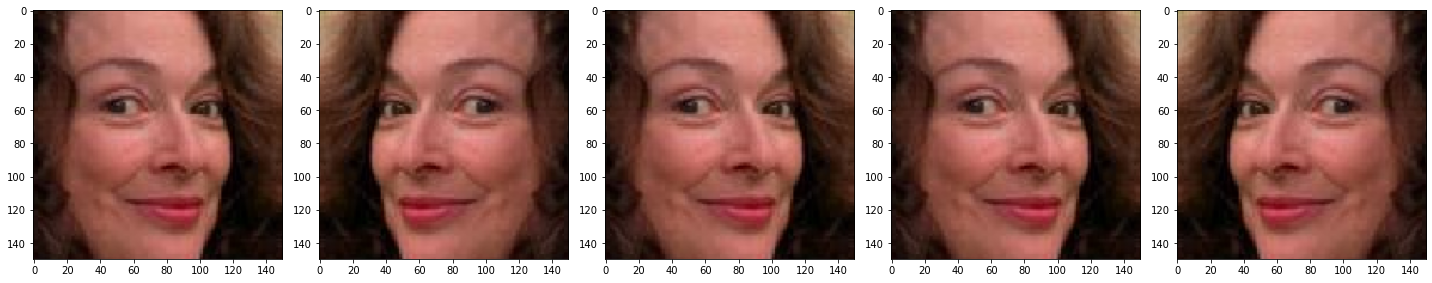

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Rotating the Image

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

Found 4462 images belonging to 3 classes.


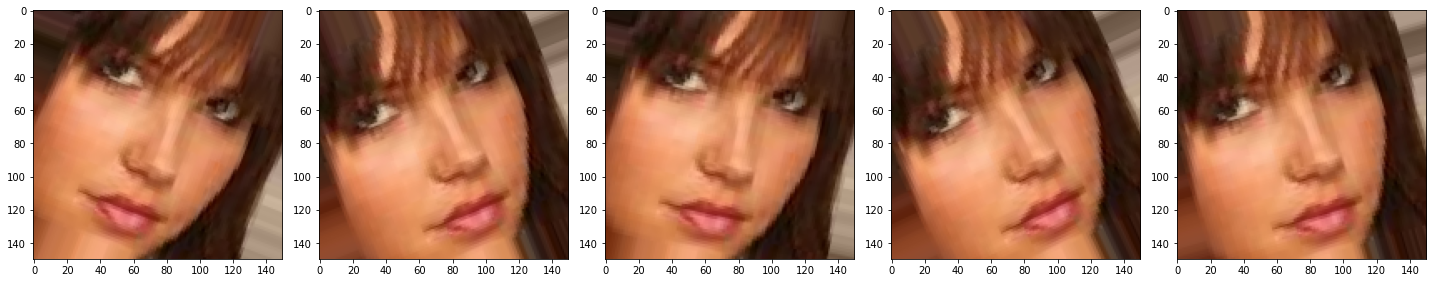

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Applying Zoom

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))


Found 4462 images belonging to 3 classes.


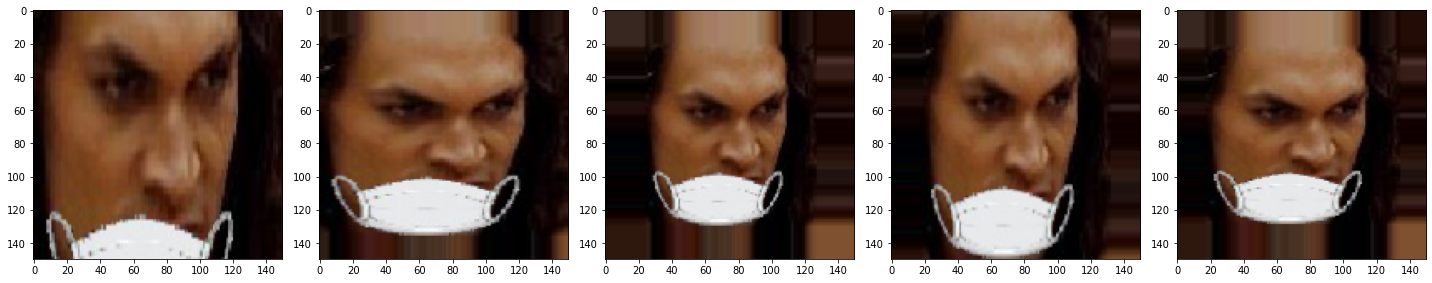

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Putting it all together.

In [ ]:
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='sparse')

Found 4462 images belonging to 3 classes.


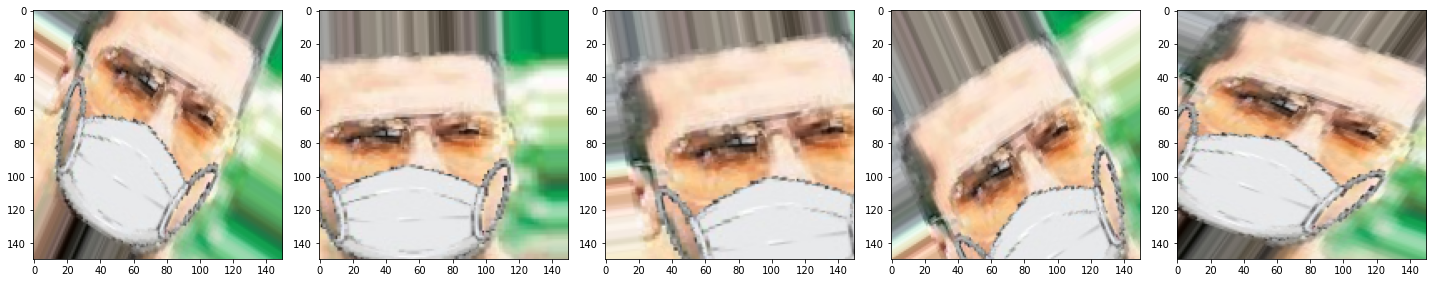

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

## Creating Validation Data Generator.

In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=validation_dir,
                                                 target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='sparse')                                                 

Found 589 images belonging to 3 classes.


## Defining the Model

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu, input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides = 2),

    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2,2), strides = 2),

    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2,2), strides = 2),

    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2,2), strides = 2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(3, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 18, 18, 128)      

## Train the model

In [ ]:
epochs=21
history = model.fit(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

Epoch 1/21
45/45 [==============================] - 29s 635ms/step - loss: 0.8754 - accuracy: 0.6708 - val_loss: 0.8080 - val_accuracy: 0.7284
Epoch 2/21
45/45 [==============================] - 28s 628ms/step - loss: 0.7739 - accuracy: 0.7716 - val_loss: 0.6956 - val_accuracy: 0.8540
Epoch 3/21
45/45 [==============================] - 29s 640ms/step - loss: 0.7236 - accuracy: 0.8250 - val_loss: 0.5874 - val_accuracy: 0.9677
Epoch 4/21
45/45 [==============================] - 28s 627ms/step - loss: 0.6567 - accuracy: 0.8951 - val_loss: 0.5658 - val_accuracy: 0.9881
Epoch 5/21
45/45 [==============================] - 28s 624ms/step - loss: 0.6428 - accuracy: 0.9068 - val_loss: 0.8133 - val_accuracy: 0.7301
Epoch 6/21
45/45 [==============================] - 28s 631ms/step - loss: 0.6747 - accuracy: 0.8732 - val_loss: 0.5652 - val_accuracy: 0.9864
Epoch 7/21
45/45 [==============================] - 28s 620ms/step - loss: 0.6255 - accuracy: 0.9247 - val_loss: 0.5642 - val_accuracy: 0.9881

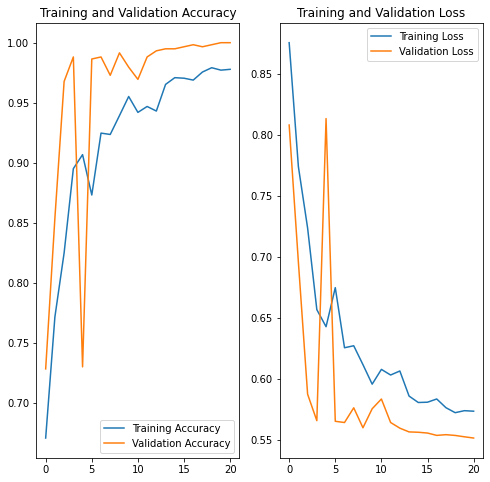

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()